# 4. 제어흐름

## 4.1 학습내용

### 4.1.1 목표

* 지난 학습 - 변수, 함수
    * 변수
        * 수첩과 같이 저장해서 다시 사용하려는 의도 (재사용)
        * 실제 값을 사용하기 보다는 변수를 사용하는 것이 재사용을 많이 할 수 있게 한다 (일반화 또는 추상화).
            * 조그만 사각형, 큰 사각형을 하나의 함수로 처리하려면 변수를 사용해야 한다.
    * 함수
        * argument(함수를 만들 때)와 parameter (함수를 호출할 때)
        * 지역변수를 돌려주는 경우 return을 사용한다.
    * 함수와 변수
        * 지역변수는 함수부에서만 (들여쓰기 한 부분에서만) 의미가 있다. 함수부를 벗어나면 파괴된다.
        * 전역변수는 어느 곳에서나 사용할 수 있다.
    
* 이번 학습에서는 변수에 따라 프로그래밍의 흐름을 제어할 수 있는 조건, 반복을 사용할 수 있게 함.
    * choice 의사결정
    * loop 반복

* 제어흐름은 다이어그램으로 표현하면 이해하기 쉽다. Activity Diagram을 사용한다.

### 4.1.2 문제

* 제어-1 도형 그리기 (반복)
* 제어-2 사용자 입력을 받아서 해당하는 도형을 그리기 (사용자 입력을 if문 처리)
* 제어-3 바람개비 도형 그리기 (if문 사용)
* 제어-4 온도변환
* 제어-5 성적처리
    * 거북이에게 학점묻기
* 제어-6 가위바위보
* 제어-7 삼각형 그리기
* 제어-8 BMI
* 제어-9 3,5 배수의 합계 (euler-1)
* 제어-10 euler-19
* 제어-11 달력


## 4.2 환경


* plantuml 설정
    * plantuml이 다이어그램을 생성할 때, GRAPHVIZ를 사용한다. 이를 우선 설정하는 것이 필요하다.
        * 주의
            * 실행파일을 경로로 잡아준다 (폴더가 아니다)
            * 리눅스 실행파일 dot, 윈도우 실행파일 dot.exe
    * ipython notebook에서 사용할 수 있게 plantuml 라이브러리 호출 (명령어는 %install_ext)
    * 명령어 사용할 수 있게 준비 (%load_ext)
    * plantuml.jar 내려받아 저장되었는지 확인
    * 경로의 설정은 참조 "1\_hello_ plantuml.ipynb"
    * 리눅스/맥을 기준으로 설명한다. 윈도우는 디렉토리를 찾아서 넣어주면 된다.


In [7]:
import os
mypwd=os.path.join(os.path.expanduser('~'),'Code/git/p2')
%cd {mypwd}

/Users/media/Code/git/p2


In [8]:
import os
# 작업폴더를 저장해 놓는다.
mywd=%pwd
# 작업폴더 밑 lib폴더 안에 plantuml.jar를 저장한 경우
myplantdir=os.path.join(mywd,'lib')
# 1) 리눅스 /usr/bin/에 dot 실행파일이 있는 경우 별도 설정을 해주지 않아도 된다.
# 리눅스 which명령어 사용해서 dot실행파일이 있는 곳을 알아낸댜.
# 그 결과가 목록이므로, 첫번째 값을 실행파일로 설정해준다.
# 2) 맥 macport를 사용하는 경우, dot경로
# mydotdir='/opt/local/bin/dot'
# 2) 윈도우 -> 환경변수에서 읽어온다.
# mydot="C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe"
mydotdir=!which dot
mydot=mydotdir[0]
# 2) 윈도우 -> 환경변수에서 가져와서 설정해준다.
# mydot="C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe"


In [9]:
# plantuml.jar파일이 존재하는지 확인한다.
import glob
%cd {myplantdir}
glob.glob(r'./*.jar')

/Users/media/Code/git/p2/lib


['./plantuml.jar']

In [10]:
import os
os.environ['GRAPHVIZ_DOT']=mydot
print os.environ['GRAPHVIZ_DOT']
!java -jar {myplantdir}/plantuml.jar -testdot

/opt/local/bin/dot
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


In [4]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [5]:
%load_ext plantuml_magics

## 4.3 제어흐름이란?

* Control Flow 또는 Flow of Control
* 프로그래밍에서 명령문이 실행되는 순서를 제어하는 것.
* 프로그래밍에서는 앞서 있는 명령문이, 뒤에 있는 것보다 먼저 실행된다
    * 순차적 sequential order
* goto 명령문의 문제
    * 프로그램의 흐름을 순차적이지 않게 만든다.
    * goto 명령문은 if-then, while로 변경하도록 한다.
* 조건과 반복을 통한 제어구조
    * 조건 반복은 앞서 배운 변수를 먼저 이해해야 한다.

### 4.3.1 조건

* 조건 choice
* IF, ELSE를 이용해 조건에 따라 실행되는 명령문을 제어한다.
* 종류
    * simple
    ```
    if 조건:
    
    ```

    * multi-way
    ```
    if 조건:
    
    elif 조건:
    
    else:
    ```
    
    * nested
    
    ```
    if 조건:
           if 조건:
           else:
    else:
    ```
    
* logical operator
    * 조건은 항상 True 또는 False 값을 가진다.
    * 복합조건은 논리연산자를 사용하여 표현한다.

* 간단한 if문을 나타내면 다음과 같다.

In [10]:
if 1:
    print "This is true."
elif 0:
    print "This is false."

This is true.


### 4.3.2 반복

* 반복 loop - 반복횟수를 정하거나 조건에 따라 명령문의 실행을 반복한다.
    * 반복횟수에 따른 반복 count controlled loop
        * FOR
    * 조건에 따른 반복 condition controlled loop
        * WHILE, DO-WHILE
    * 무한반복 infinite loop
        * 끝내는 경우를 만들어 주지 않으면, 끝낼 수 없는 반복
        ```
        done = "n"
        while done == "n":
                done = input("done? (y/n): ")
        ```
    * 구조
        * simple loop
        ```
        for :
        ```
        
        * nested loop
        ```
        for :
               for :
        ```
        

* x = range(0,5)는 x가 0,1,2,3,4를 가질 수 있다는 것을 의미한다.
$$ 0 \le x<5, x=정수$$

* 파이프에 0,1,2,3,4를 넣고, 0부터 1개씩 꺼내는 것으로 이해하면 쉽다.


In [ ]:
for i in range(0,10):
    print i

### 4.3.3 다이어그램

* 단순
* 반복
* 조건

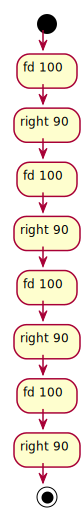

In [6]:
%%plantuml
@startuml
start

:fd 100;
:right 90;
:fd 100;
:right 90;
:fd 100;
:right 90;
:fd 100;
:right 90;
stop
@enduml

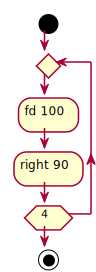

In [34]:
%%plantuml
@startuml
start

repeat
:fd 100;
:right 90;
repeat while(4)

stop
@enduml

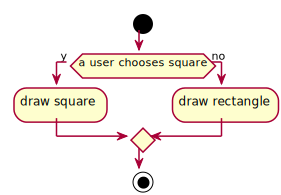

In [14]:
%%plantuml
@startuml
start
if (a user chooses square)then (y)
:draw square;
else (no)
:draw rectangle;
endif
stop
@enduml

## 제어-1: 도형 그리기

* 삼각형, 사각형, 별을 그린다.
    * 중복되는 명령문은 반복문을 사용한다.
    * 각 도형그리기를 함수로 만든다.
* 절차
    * 다이어그램을 그린다.
    * 다이어그램에 표현된 절차를 하나씩 프로그램으로 구현한다.
* 프로그래밍 요소
    * 반복문을 사용할 수 있다.
    * 중복을 줄이기 위해 함수를 사용하는 것과 반복문을 사용하는 차이를 이해한다.

In [17]:
import turtle
wn=turtle.Screen()
t1=turtle.Turtle()

In [20]:
# 사격형 그리기
t1.forward(50)
t1.right(90)
t1.forward(50)
t1.right(90)
t1.forward(50)
t1.right(90)
t1.forward(50)
t1.right(90)

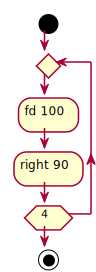

In [35]:
%%plantuml
@startuml
start

repeat
:fd 100;
:right 90;
repeat while(4)

stop
@enduml

In [21]:
t1.home()
t1.clear()

# 반복을 이용
for i in range(0,4):
    t1.forward(100)
    t1.right(90)

* 기계적으로 함수 만들어보기
    * 중복을 찾는다
    * 중복을 묶고 함수명을 준다 -> drawSquare
    * 변경되는 것을 찾는다 -> size 250, 나머지는 변하지 않는다.
    * 인자로 빼준다 -> size 정수

In [22]:
def drawSquare(size):
    for i in range(0,4):
        t1.forward(size)
        t1.right(90)

t1.home()
t1.clear()
drawSquare(100)

In [23]:
# 삼각형 그리기
def drawTriangle(size):
    for i in range(0,3):
        t1.forward(size)
        t1.right(120)

t1.home()
t1.clear()
drawTriangle(120)

In [25]:
def drawSquareAt(size, pos):
    t1.penup()
    t1.setpos(pos)
    t1.pendown()
    for i in range(0,4):
        t1.forward(size)
        t1.right(90)

t1.home()
t1.clear()
drawSquareAt(100,(100,100))

In [28]:
t1.home()
t1.clear()
# star
for i in range(5):
    t1.forward(100)
    t1.right(144)

In [33]:
def drawStarFill(size, color):
    angle = 144
    t1.fillcolor(color)
    t1.begin_fill()
    for side in range(5):
        t1.forward(size)
        t1.right(angle)
    t1.end_fill()

t1.home()
t1.clear()
drawStarFill(100, "purple")


In [31]:
# polygon
def drawPolygon(size,tilt,sides):
    t1.right(tilt)
    for i in range(0,sides):
        t1.forward(size)
        t1.right(360/sides)

t1.home()
t1.clear()
drawPolygon(100,30,6)
drawPolygon(100,60,4)

## 제어-2: 사용자 입력을 받아서 해당하는 도형을 그리기

* 사용자에게 입력을 받아서, 삼각형 사각형을 그린다.
* 삼각형, 사각형 함수를 1개로 만든다.
    * 인자는 size, sides, angle로 한다.
    * 삼각형은 3면, 사각형은 4면을 가진다.
    * 삼각형은 120, 사각형은 90도 회전을 한다.
* 절차
    * 다이어그램을 그린다.
    * 다이어그램에 표현한 절차에 따라 프로그램으로 만들어 본다.

* 프로그래밍 요소:
    * 사용자 입력을 받는다.
    * 변수를 사용한다.
    * 조건문을 사용한다.
    * 다이어그램을 사용한다.


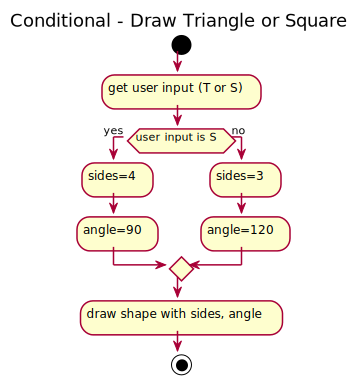

In [36]:
%%plantuml
@startuml

title Conditional - Draw Triangle or Square


start

:get user input (T or S); 

if (user input is S) then (yes)
  :sides=4;
  :angle=90;
else (no)
  :sides=3;
  :angle=120;
endif

:draw shape with sides, angle;

stop

@enduml

* raw_input함수
    * 인자는 문자열
    * 입력 값을 돌려주는 함수
        * 돌려받은 값이 숫자이더라도 연산을 하면 되지 않는 이유를 생각해 본다.
    * 입력값은 sel에 저장된다.

In [21]:
# 사용자 입력받기
sel=raw_input("Triange or Square (T or S): ")
print sel

Triange or Square (T or S): hello
hello


In [ ]:
sel=raw_input("Triange or Square (T or S): ")
size=100
if sel=='T':
    sides=3
    angle=120
elif sel=='S':
    sides=4
    angle=90
for i in range(0,sides):
    t1.forward(size)
    t1.right(angle)

In [44]:

def drawSquareOrTriangle(size,sides,angle):
    t1.home()
    t1.clear()
    for i in range(0,sides):
        t1.forward(size)
        t1.right(angle)

sel=raw_input("Triange or Square (T or S): ")
size=100
if sel=='T':
    sides=3
    angle=120
elif sel=='S':
    sides=4
    angle=90
drawSquareOrTriangle(100, sides, angle)

Appending to src/pfun.py


## 제어-3 바람개비 도형 그리기

* 바람개비는 반복을 한다. 반복문 for를 사용한다.
* 경우에 따라서 크기를 키워야 한다. 조건문 if를 사용한다.
* 바람개비 모양
    * 커지는 패턴을 확인한다.
    * 짝수 마다 크기를 늘려주기로 한다.
* 함수
    * makeSwirlSquare(size,bigger,turns,angle)

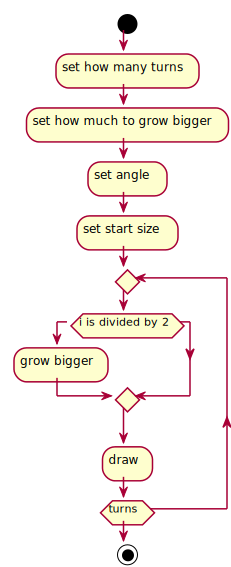

In [39]:
%%plantuml
@startuml
start
:set how many turns;
:set how much to grow bigger;
:set angle;
:set start size;
repeat
if (i is divided by 2) then
    :grow bigger;
endif
:draw;
repeat while(turns)
stop
@enduml

* % 연산자 (modulo)
    * 나머지가 있으면 1
    * 나머지가 없으면 0
* if문과 modulo
    * 나머지가 있으면 TRUE
    * 나머지가 없으면 FALSE
* if 문에 not 연산자를 섞어쓰면 이해하기 어려워진다.

In [14]:
if 6%2:
    print "there is a remainder!"
else:
    print "there is no remainder!"

there is no remainder!


In [15]:
if not 6%2:
    print "there is no remainder!"
else:
    print "there is a remainder!"

there is no remainder!


In [16]:
#for문과 결합해서 해 본다.
x=range(0,10)
for i in x:
    if i%2:
        print i,

1 3 5 7 9


In [21]:
sides=10
size=5
bigger=15
for i in range(0,10):
    if not (i%2):
        size+=bigger
    print i, size

0 20
1 20
2 35
3 35
4 50
5 50
6 65
7 65
8 80
9 80


In [23]:
turns=20
angle=90
size=5
bigger=15
t1.home()
t1.clear()
for i in range(0,turns):
    if not (i%2):
        size+=bigger
    t1.forward(size)
    t1.right(angle)

In [27]:
def makeSwirlSquare(size,bigger,turns,angle):
    nBigger=2
    for i in range(0,turns):
        #if divided by nBigger, make it bigger
        if not i%nBigger:
            size+=bigger
        t1.forward(size)
        t1.right(angle)

turns=20
size=5
bigger=15
angle=90
t1.home()
t1.clear()
makeSwirlSquare(size,bigger,turns,angle)

## 제어-4: 온도를 입력받아서 F-C 변환

* 프로그래밍 요소
    * 다분기 if-elseif를 이해한다.
    * 사용자 입력을 이해한다.
    * 데이터형 (문자열, 정수, 소수)을 이해한다.
    * 화면출력을 이해한다.

* 앞서 배운 변수를 이해하고, 사용자에게서 받은 변수에 따라 프로그램의 반응이 달라진다.

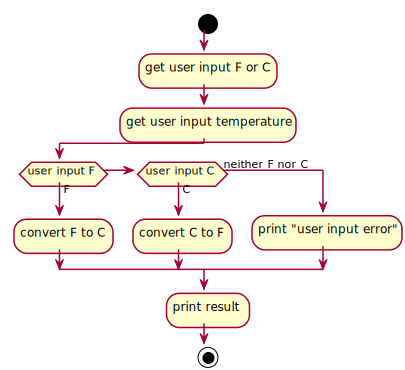

In [6]:
%%plantuml
@startuml
start
:get user input F or C;
:get user input temperature;
if (user input F) then (F)
    :convert F to C;
elseif(user input C) then(C)
    :convert C to F;
else(neither F nor C)
:print "user input error";
endif
:print result;
stophttp://localhost:8888/notebooks/4_5_controlstructure.ipynb#
@enduml

### 변수의 이해

* 변수는 메모리에 저장된 값에 대한 명칭이다.
* 변수를 저장하는 이유는, 다시 사용하려고 하기 때문이다.

### 사용자에게서 입력 받기

* 사용자에게 입력을 받는 것은 컴퓨터에게서 받는 것보다 어렵다.
    * 사용자는 예상하지 못한 입력을 넣는 경우가 있기 때문에 오류를 확인하는 것이 필수적이다.
        * 숫자를 넣으라고 하면, 문자를 넣거나
        * 문자만을 넣으라고 하면, 특수문자를 넣거나
* input
    * 사용자 입력 값을 받아서 파이썬 명령어로 실행.
    * eval(raw_input(prompt))와 동일한 의미. 사용자에게 입력을 받아서 파이썬 명령어로 실행한다는 의미.
    * 수를 입력할 경우에는 그냥, 문자는 따옴표
    * 사용자가 입력을 잘 못하면 오류가 남
* raw_input
    * 사용자 입력 값을 받아서 문자열로 그 값을 돌려줌.
* 2+1을 입력하면 input은 연산을 해서 그 결과 3을, 그러나 raw_input은 연산을 하지 않고 '2+1'을 문자열로 돌려줌.

In [41]:
cmd =input("입력하세요: ")
print cmd
sel = raw_input('입력을 고르세요:')
print sel

입력하세요: 1+2
3
입력을 고르세요:1+2
1+2


### 화면출력 값의 이해
* print "%d", 12.3는 정수로 형변환을 해서 출력을 하므로 12.
* print "%s", 12.3는 문자열로 형변환을 해서 출력하므로 숫자가 아닌 문자열 12.3.
* print "%.2f", 12.3는 소수점 2자리로 출력을 하므로 12.30.
* 파이썬 2.6부터는 .format이란 명령어 지원
    * {0:d} 0번째 입력 값을 정수로 출력
    * {1:s} 1번째 입력 값을 문자열로 출력
    * {2:.2f} 2번째 입력 값을 소수점 2자리로 출력
    * 단 입력 값의 데이터형이 맞지 않을 경우 오류가 발생하므로, 형변환을 해주어야 함.

In [27]:
print "%d" % 12.3
print "%s" %12.3
print "%.2f" % 12.3
print "첫 번째 {0:d} 두 번째 {1:s} 세 번째 {2:.2f}".format(int(12.3),str(12.3),12.3)

12
12.3
12.30
첫 번째 12 두 번째 12.3 세 번째12.30


In [5]:
sel = raw_input('입력하세요 (F 또는 C): ')
temp = raw_input('온도를 입력하세요: ')
print "선택한 값은: ",sel
print "입력한 온도는: %s" % temp

입력하세요 (F 또는 C): F
온도를 입력하세요: 10
선택한 값은:  F
입력한 온도는: 10


In [31]:
sel = raw_input('입력하세요 (F 또는 C):')
temp = raw_input('온도를 입력하세요:')
temperature = int(temp)
if sel=='F':
    res=(temperature-32)*5/9.0
elif sel=='C':
    res=temperature*9.0/5.0+32
else:
    print "선택은 F또는 C이어야 합니다."
print "{0:d}{1:s}를 변환하면 {2:.2f}입니다".format(temperature,sel,res)

입력하세요 (F 또는 C):F
온도를 입력하세요:50
50F를 변환하면 10.00입니다


### 함수로 변환

* 함수의 입력 값, 출력 값을 정의해 줌. 입력 변수명, 출력 변수명이 반드시 같을 필요가 없슴.
* 함수를 사용하면 재사용할 수 있게 된다.
* 아래에서 res를 미리 선언하여, 초기화하는 것이 좋음.
    * 파이썬은 변수의 선언이 별도로 필요하지 않은 언어이지만 다른 언어에서는 그렇게 함.
    * 초기화한다는 것은 데이터형에 맞는 바이트만큼의 크기를 할당한다는 의미.

In [34]:
#%%writefile /Users/media/Code/git/p2/src/pfun.py -a
sel = raw_input('입력하세요 (F 또는 C):')
temp = raw_input('온도를 입력하세요:')
temperature = int(temp)

def computeTemperature(sel,temperature):
    res=0.0
    if sel=='F':
        res=(temperature-32)*5/9.0
    elif sel=='C':
        res=temperature*9.0/5.0+32
    else:
        print "선택은 F또는 C이어야 합니다."
    print "{0:d}{1:s}를 변환하면 {2:.2f}입니다".format(temperature,sel,res)
    return res

result=computeTemperature(sel,temperature)
print "{0:d}{1:s}를 변환하면 {2:.2f}입니다".format(temperature,sel,result)

입력하세요 (F 또는 C):F
온도를 입력하세요:100
100F를 변환하면 37.78입니다
100F를 변환하면 37.78입니다


### 고려할 점
* 대소문자입력 - 사용자가 소문자 f c를 입력하는 경우
* 연산할 경우 소수점 처리: 정수끼리 나누면 출력 값은 정수
* 연산의 우선순위
* 결과 값이 섭씨(C)인지 화씨(F)인지 표시.

## 제어-5: 성적을 입력받아 A~F 학점 처리

* 문제 1-2 온도변환 참조
* 프로그래밍 요소
    * 다분기 조건을 사용한다.
    * 사용자 입력을 받는다.
    * 사용자 입력 값을 연산하려면 소수로 받는다.
    * 값을 형식에 맞추어 출력한다.


### 입력 값의 처리

* 사용자 입력 값: 앞의 예는 정수로 변환. 점수는 소수점으로 변환.
* if문은 다분기, 구간별 조건.
* 사용자 입력이 100점 이상, 0점 이하인 경우는 else문에서 처리.
* 사용자 입력이 문자, 특수문자를 포함할 경우 처리하지 않고 있슴.

In [4]:
marksTmp = raw_input('성적을 입력하세요 (0~100):')
marks = float(marksTmp)
print "입력 값은: ",marks

성적을 입력하세요 (0~100):66
입력 값은:  66.0


### 함수로 변환

* 함수의 입력은 marks, 출력은 grade.
* 사용자 입력 값에 특수문자가 섞이면 정규식regexp로 처리 가능.

## 제어-6: 가위바위보

* 난이도 1
* 프로그래밍 요소: nested if
    * 3개의 경우를 서로 비교하게 되는 경우의 if문

### 한글을 비교하기

* 한글은 유니코드unicde.
* 지원: ipython notebook에서는 유니코드 지원. 다른 환경에서나, 파일을 읽어오는 경우 유니코드 별도 설정 필요.

In [2]:
if '가위'=='가위':
    print '서로 비긴 거 알지?!'

서로 비긴 거 알지?!


## 제어-7: 삼각형 그리기

### 상수의 사용
* 프로그램의 재사용을 향상.

### 함수로 만들 경우

* 출력 값이 없는 경우 return이 없다.
* void 함수.

## 제어-8: BMI

* 소수점 처리에 유의. 정수끼리의 연산은 정수.

In [11]:
# 170cm 75kg
weight=75
height=1.7
bmi=float(weight/ height /height)
print bmi

25.9515570934


### 함수로 만들 경우

* 키, 몸무게를 함수의 패러미터로 설계. 결합성의 최소화.
* 패러미터(매개변수)와 아규먼트(실인수)를 구분. 후자는 실제로 넘겨주는 인자 값. 
* 문자열을 return하여 출력할 수 있슴.

## 제어-9 추가

* If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.
* Find the sum of all the multiples of 3 or 5 below 1000

## 제어-7: 3, 5배수의 합계

* 난이도 1
* 프로그래밍 요소: if문과 for문을 같이 사용.
* If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.
* Find the sum of all the multiples of 3 or 5 below 1000.

## 제어-8: 

* 20c 100년 동안 매 월 첫 날이 일요일인 경우가 몇 일 (출처 euler 19)
* 윤년은 다음 문제 참조

## 제어-9: 

* 연도를 입력하면 그 연도에 1월 1일이 무슨 요일인지 처리

* 윤년은 2월에 29일 있는 해. 그 조건은
    * 4로 나누어지면서 100으로 나누어지지 않거나
    * 4로 나누어지면서 400으로 나누어짐
    * (year%4 == 0) and (year%100 !=0 or year%400==0):
*